# Test Problems

## 1.1 Predator Prey / Lotka Voltera

The Predator Pray Problem or also Lotka-Volterra; the latter formulation is often considered with more parameters:

$$\frac{d x_1(t)}{dt} = a_1 x_1 − a_2 x_1 x_2, \quad \frac{d x_2(t)}{dt} = a_3 x_1 x_2 − a_4 x_2$$

for $\mathbf{a} \in \mathbb{R}^4$ is the classic Lotka-Volterra formulation. Whereas:

$$\frac{d x_1(t)}{dt} = a_1 (1-x_2) x_1, \quad \frac{d x_2(t)}{dt} = - a_2 (1- x_1) x_2$$

is the classic Predator-Prey formulation with 2 parameters $\mathbf{a} \in \mathbb{R}^2$.

In [6]:
import numpy as np
from scipy import integrate
from scipy.integrate import solve_ivp, solve_bvp
from typing import Annotated, List, Tuple

# Prey predator function valuation
def PreyPredator(t, x, a, b):
    x1, x2 = x
    dx1= a * (1 - x2) * x1
    dx2 = -b * (1 - x1) * x2
    return [dx1,dx2]

# Jacobian of prey predator valuation
def PreyPredator_Jac(t, x, a, b):
    x1, x2 = x
    dx1x1 = a * (1 - x2) 
    dx1x2 = -a * x1
    dx2x1 = b * x2
    dx2x2 = -b * (1 - x1)
    x2_ = -b * (1 - x[0]) * x[1]
    return [[dx1x1, dx1x2], [dx2x1, dx2x2]]

# function that returns both
def PreyPredator_Fun_Jac(t, x, a, b):
    return PreyPredator(t, x, a, b), PreyPredator_Fun_Jac(t, x, a, b)


t_eval = np.linspace(0, 20, 1000)
x0 = [1, 0.05]
a, b = 1, 0.8
sol_ode45 = solve_ivp(PreyPredator, (0, 20), x0, args=(a, b,), t_eval=t_eval, method='RK45')
sol_ode15s = solve_ivp(PreyPredator, (0, 20), x0, args=(a, b,), t_eval=t_eval, method='BDF',jac = PreyPredator_Jac)


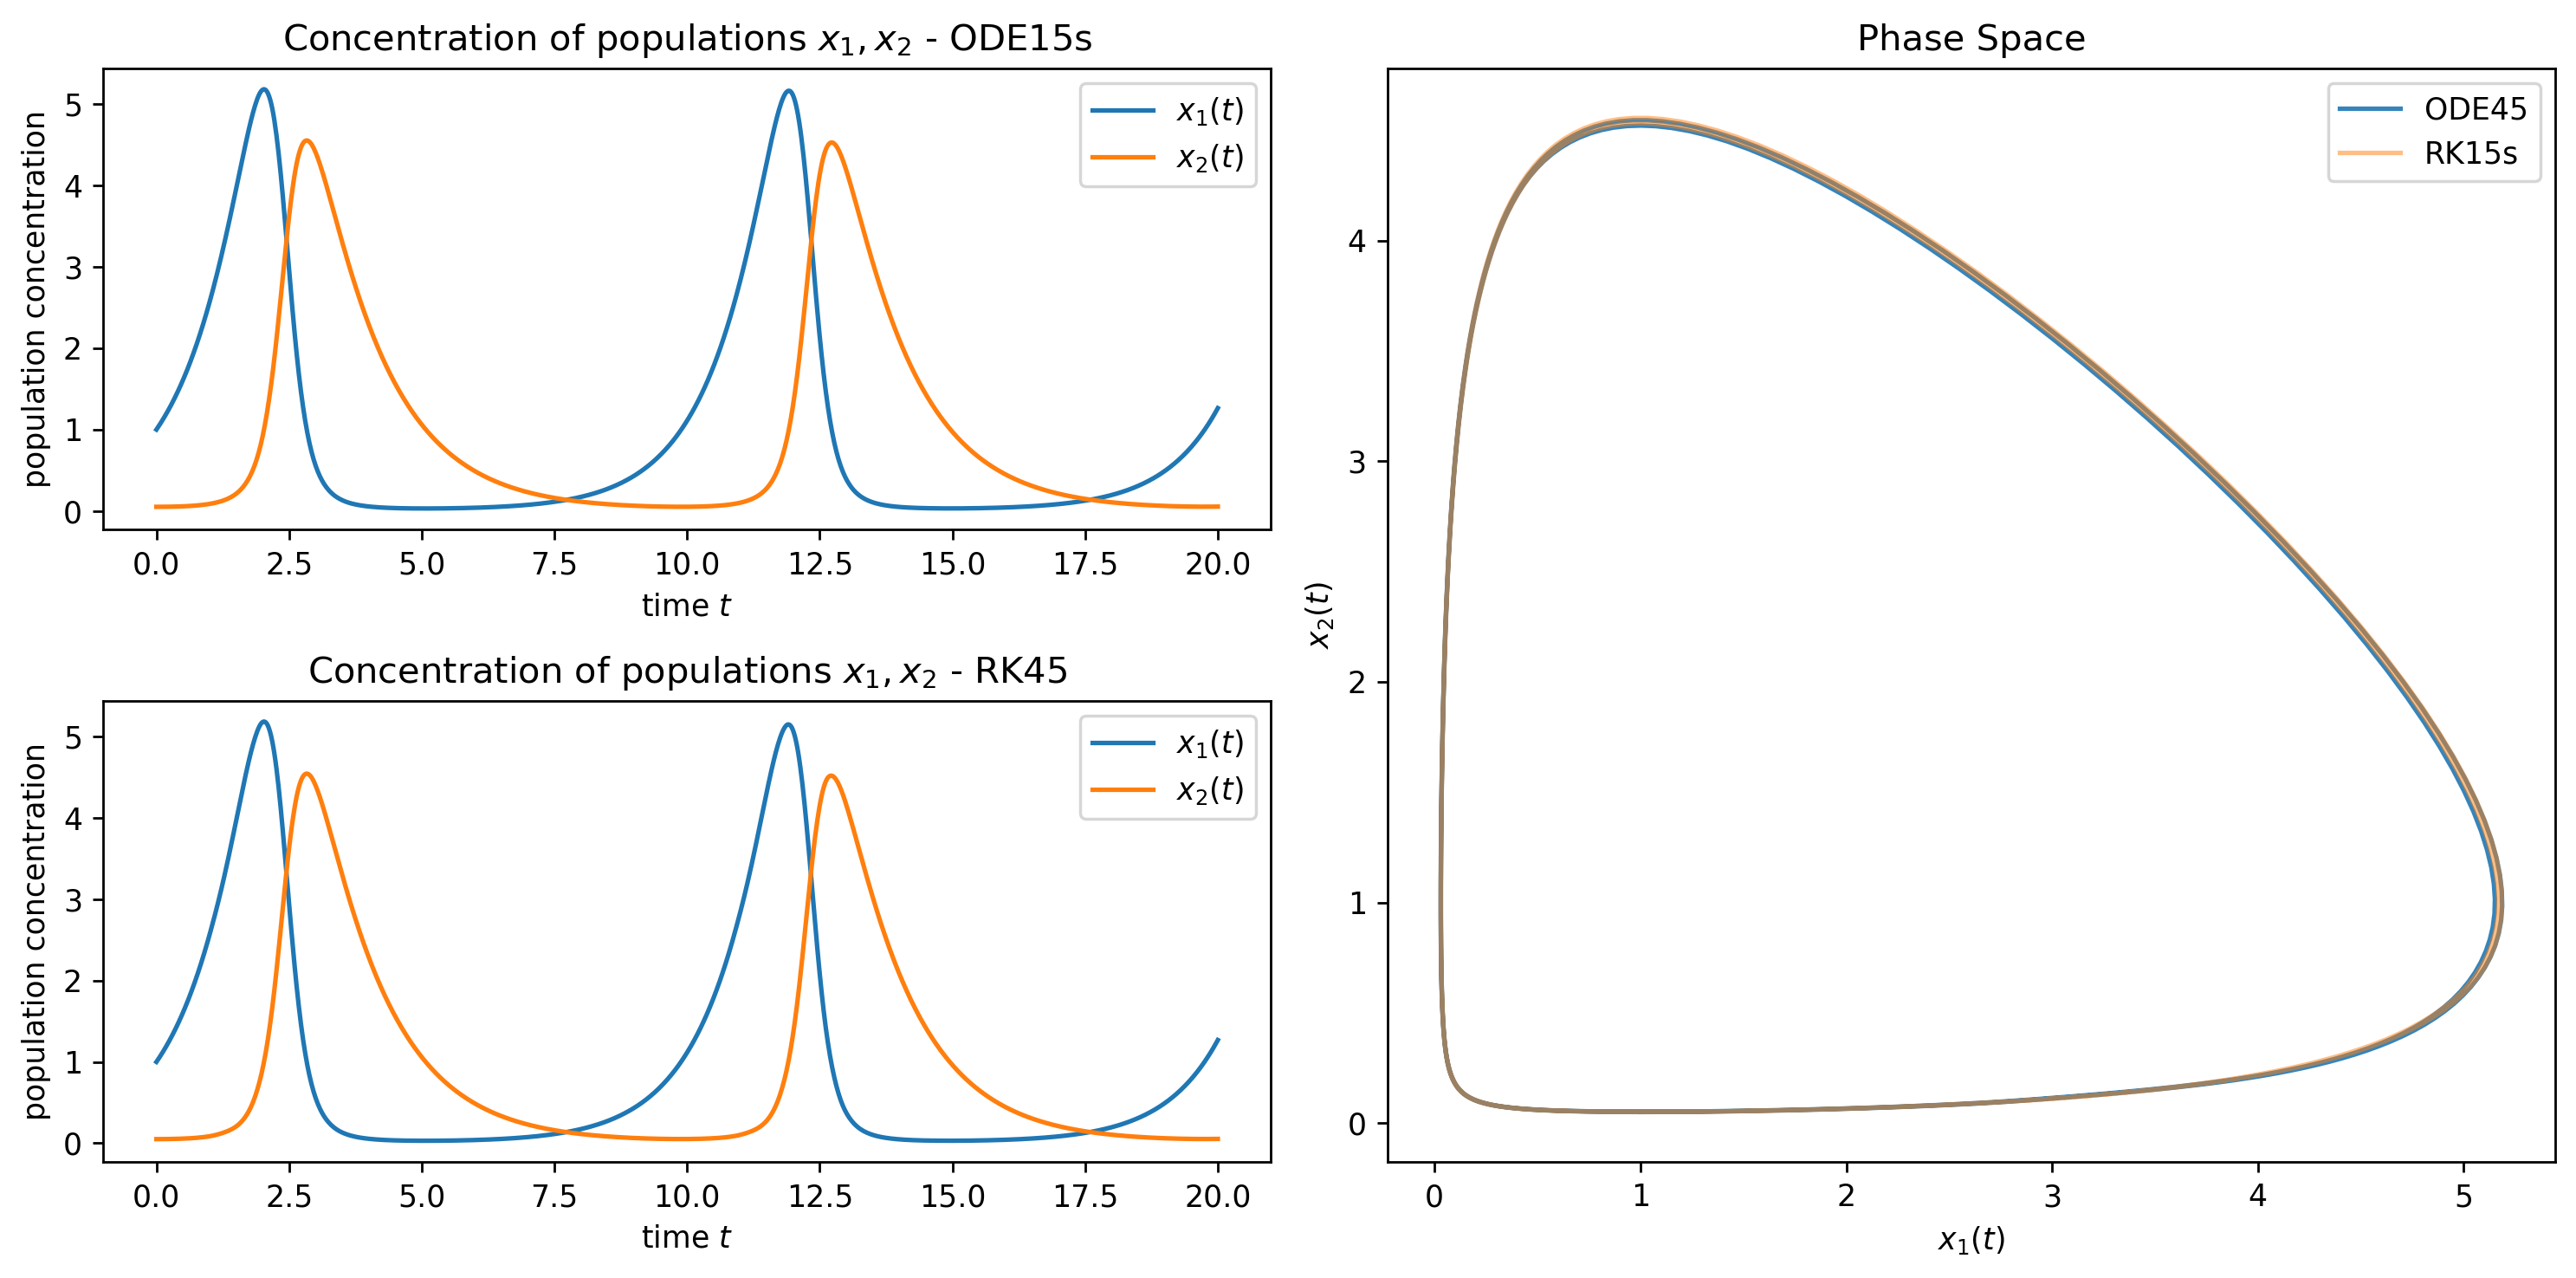

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6), dpi=250)

plt.subplot(2,2,1)
plt.plot(t_eval, sol_ode15s.y[0], label='$x_1(t)$')
plt.plot(t_eval, sol_ode15s.y[1], label='$x_2(t)$')
plt.legend()
plt.title("Concentration of populations $x_1, x_2$ - ODE15s")
plt.xlabel("time $t$") 
plt.ylabel("population concentration")

plt.subplot(2,2,3)
plt.plot(t_eval, sol_ode45.y[0], label='$x_1(t)$')
plt.plot(t_eval, sol_ode45.y[1], label='$x_2(t)$')
plt.title("Concentration of populations $x_1, x_2$ - RK45")
plt.xlabel("time $t$") 
plt.ylabel("population concentration")
plt.legend()

plt.subplot(1,2,2)
plt.plot(sol_ode45.y[0], sol_ode45.y[1], label='ODE45', alpha=0.9)
plt.plot(sol_ode15s.y[0], sol_ode15s.y[1], label='RK15s', alpha=0.5)
plt.title("Phase Space")
plt.xlabel("$x_1(t)$") 
plt.ylabel("$x_2(t)$")
plt.legend()

plt.tight_layout()

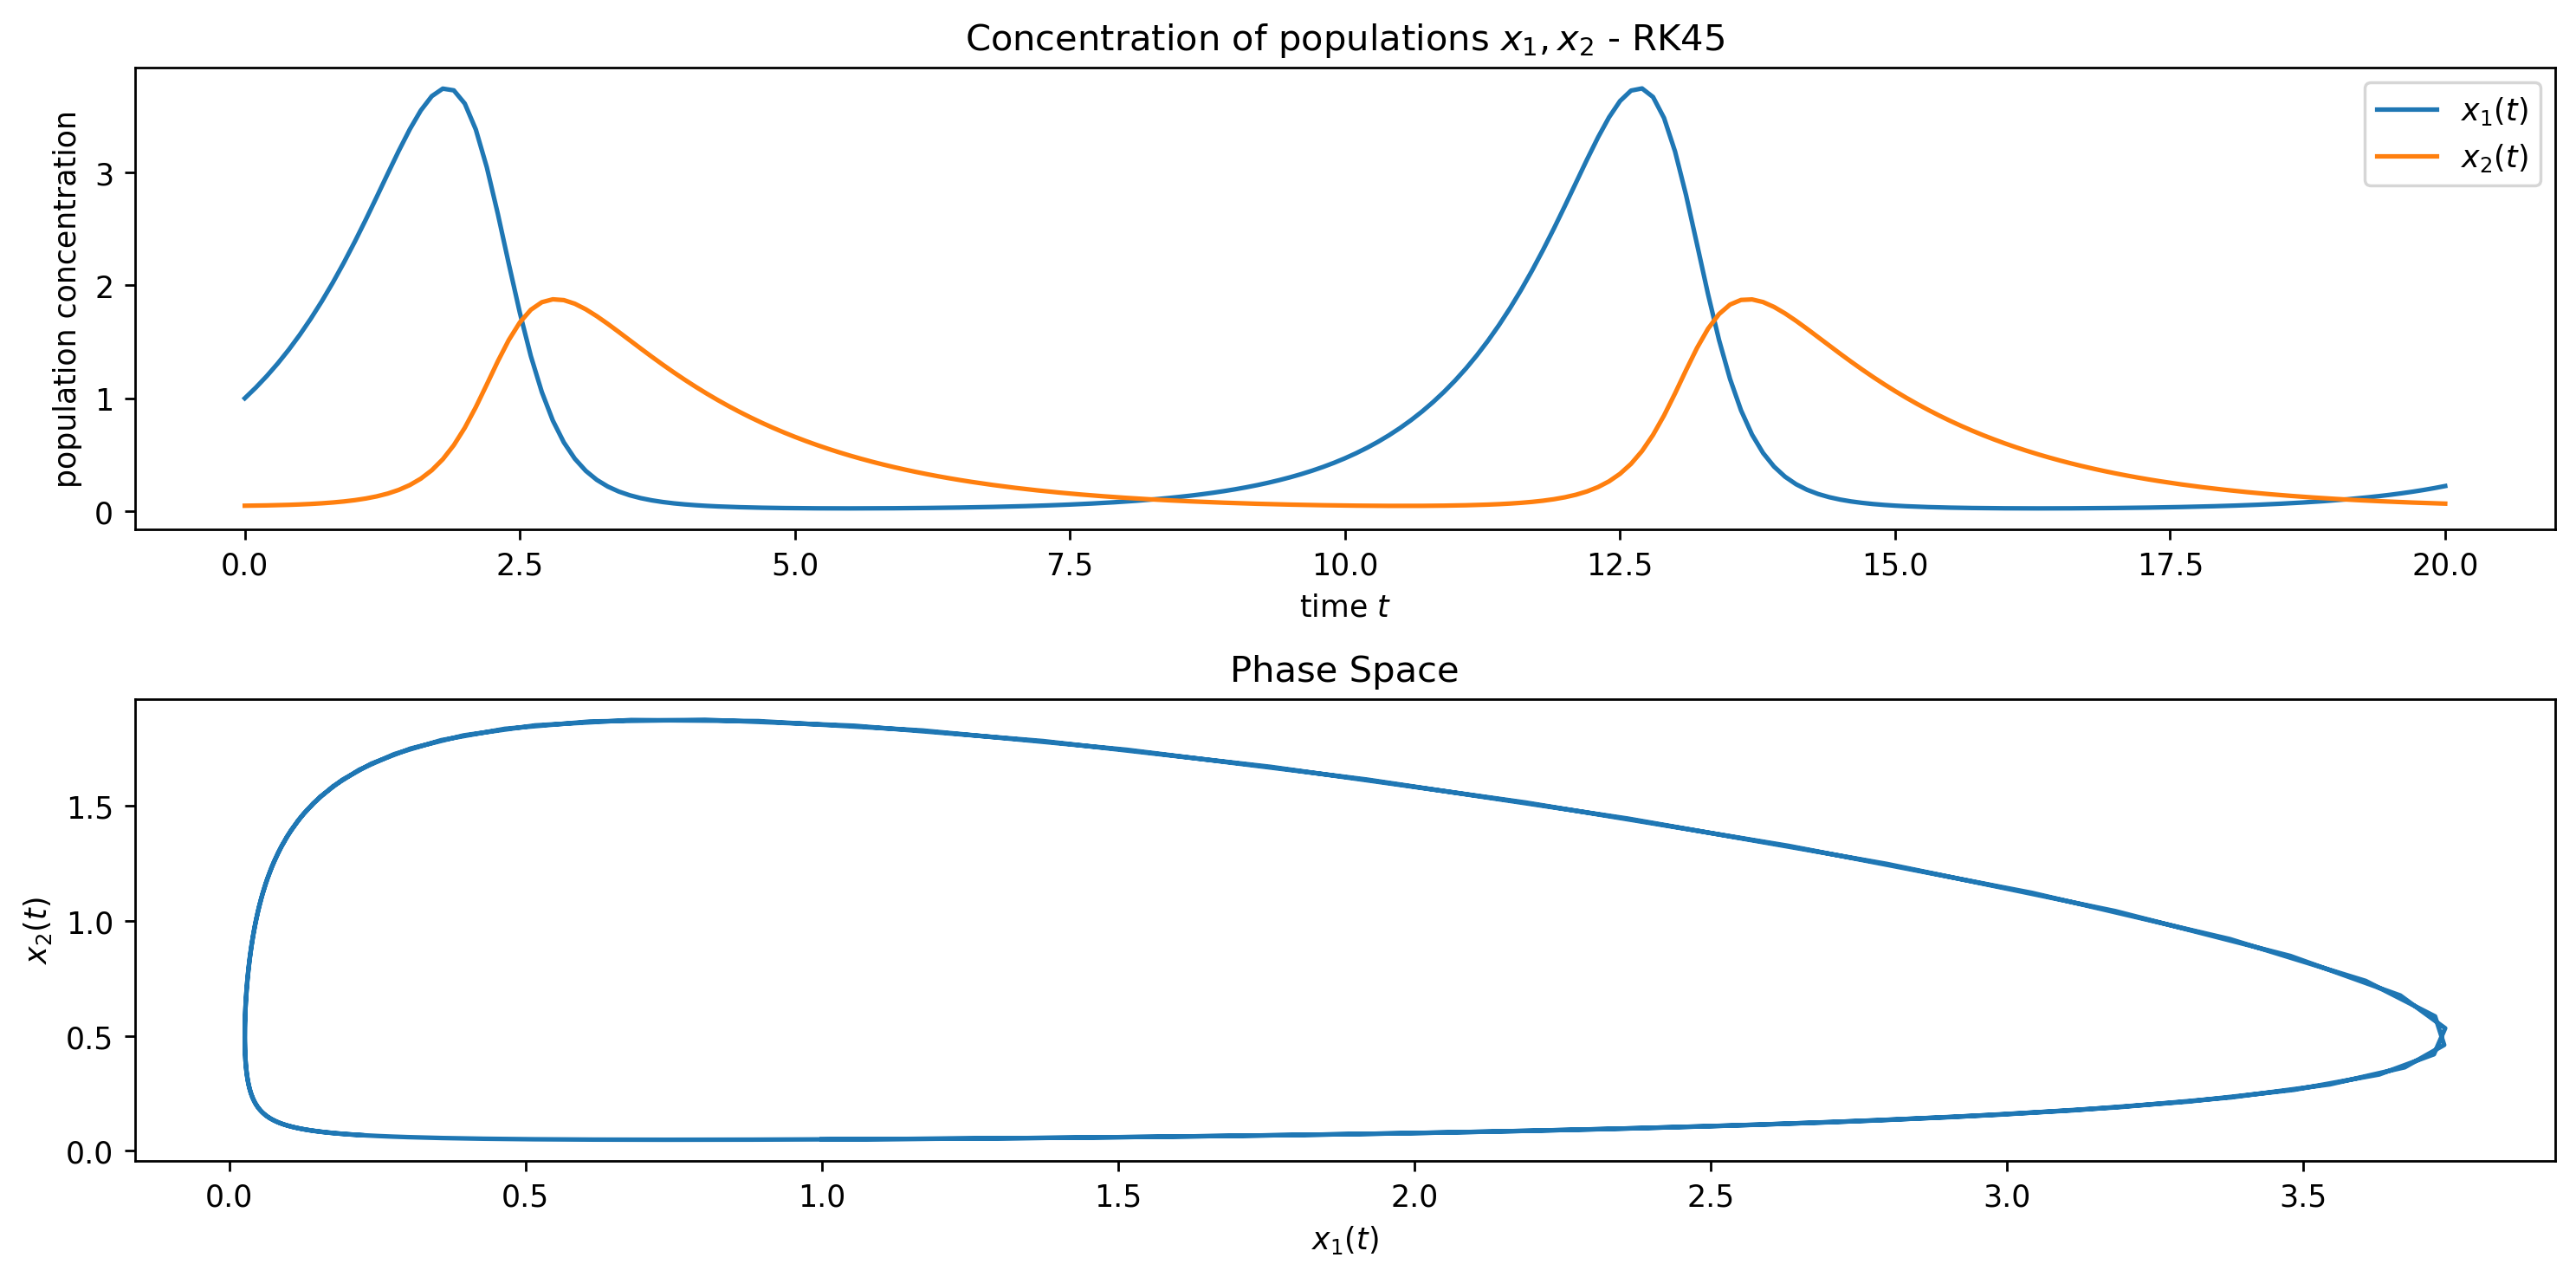

In [25]:
def LotkaVolterra(x, t, a1, a2, a3, a4) -> list:
    return [a1*x[0]-a2*x[0]*x[1], a3*x[0]*x[1]-a4*x[1]]

# Konstanten und Werte
t_out = np.linspace(0,20,201)   # Zeit Granularität
ai = (1, 2, 0.8, 0.6)           # Konstanten
x0 = [1, 0.05]                  # Anfangsbedingungen

x_out = integrate.odeint(LotkaVolterra, x0, t_out, ai)

plt.figure(figsize=(12,6), dpi=250)

plt.subplot(2,1,1)
plt.plot(t_out, x_out[:,0], label='$x_1(t)$')
plt.plot(t_out, x_out[:,1], label='$x_2(t)$')
plt.title("Concentration of populations $x_1, x_2$ - RK45")
plt.xlabel("time $t$") 
plt.ylabel("population concentration")
plt.legend()

plt.subplot(2,1,2)
plt.plot(x_out[:,0], x_out[:,1])
plt.title("Phase Space")
plt.xlabel("$x_1(t)$") 
plt.ylabel("$x_2(t)$")

plt.tight_layout()

## 1.3 Chemical Reaction in adiabatic reactors

### 1.3.2 CSTR 3-state model

Given the system:

$$\begin{aligned}
\frac{dC_A}{dt} & =\frac{F}{V}\left(C_{A, i n}-C_A\right)+R_A\left(C_A, C_B, T\right), \\
\frac{dC_B}{dt} & =\frac{F}{V}\left(C_{B, i n}-C_B\right)+R_B\left(C_A, C_B, T\right), \\
\frac{dT}{dt} & =\frac{F}{V}\left(T_{i n}-T\right)+R_T\left(C_A, C_B, T\right) .
\end{aligned}$$

we derive the Jacobian as $J_C = [\frac{dC_A}{dt dC}, \frac{dC_B}{dt dC}, \frac{dT}{dt dC}]^T$

$$
R\left(C\right) = \boldsymbol{\nu}^T \mathbf{r}, \quad 
\boldsymbol{\nu} = [-1, -2, \beta ], \quad
\mathbf{r} = r(C) = k(T) C_A C_B
$$

then

$$\begin{align*}
R_A(C) &= R_A(C_A, C_B, T) &= - k_0 \exp (\frac{-E_a}{R_c T}) C_A C_B \\
R_B(C) &= R_A(C_A, C_B, T) &= -2 k_0 \exp (\frac{-E_a}{R_c T}) C_A C_B \\
R_T(C) &= R_A(C_A, C_B, T) &= \beta k_0 \exp (\frac{-E_a}{R_c T}) C_A C_B \\
\end{align*}$$

$R_c$ and $\beta = \frac{-\Delta H_r}{\rho c_P}$ as a constant.

$$ J_C = 
\begin{bmatrix}
\frac{F}{V} + - k_0 \exp (\frac{-E_a}{R_c T}) C_B & - k_0 \exp (\frac{-E_a}{R_c T}) C_A & (-T^{-2} \frac{-E_a}{R_c}) R_A \\
- 2 k_0 \exp (\frac{-E_a}{R_c T}) C_B & - 2 k_0 \exp (\frac{-E_a}{R_c T}) C_A + \frac{F}{V} & (-T^{-2} \frac{-E_a}{R_c}) R_B \\
\beta \exp (\frac{-E_a}{R_c T}) C_B & \beta \exp (\frac{-E_a}{R_c T}) C_A & \frac{F}{V} (-T^{-2} \frac{-E_a}{R_c}) R_T \\
\end{bmatrix}$$